In [1]:
from typing import Optional, Tuple
from grl.utils.graphing_utils import parse_run_results, graph_df_and_save_figure

graph_title = "Leduc Poker"
xlim: Optional[Tuple[float, float]] = (0, 1e7)
ylim: Optional[Tuple[float, float]] = (0, 3.0)
use_approx_exploitability = False

In [2]:
# All keys are expected to be in the format "<algorithm name> <seed number>".

non_psro_runs = {
    "NFSP 1": "/home/jblanier/git/grl/grl/data/leduc_nfsp_dqn_sparse_05.07.02PM_Aug-04-2021kqrum7_6/result.json",
    "NFSP 2": "/home/jblanier/git/grl/grl/data/leduc_nfsp_dqn_sparse_04.18.39PM_Aug-06-202106ggeb5w/result.json",
    "NFSP 3": "/home/jblanier/git/grl/grl/data/leduc_nfsp_dqn_sparse_06.27.29PM_Aug-06-2021ihrdz21k/result.json",

    "PPO Self-Play 1": "/home/jblanier/git/grl/grl/data/self_play_leduc_psro_ppo_discrete_action/leduc_psro_ppo_discrete_action_sparse_09.08.47PM_Jul-29-2022trmqm94n/result.json",
    "PPO Self-Play 2": "/home/jblanier/git/grl/grl/data/self_play_leduc_psro_ppo_discrete_action/leduc_psro_ppo_discrete_action_sparse_09.09.22PM_Jul-29-2022u1waantv/result.json",
    "PPO Self-Play 3": "/home/jblanier/git/grl/grl/data/self_play_leduc_psro_ppo_discrete_action/leduc_psro_ppo_discrete_action_sparse_09.10.05PM_Jul-29-2022mc_f70rz/result.json",

}

psro_runs = {
    # S-PSRO avg 0.1 10000 force spbr 0.1
    "SP-PSRO (1 seed) 1": "/home/jblanier/git/grl/grl/data/leduc_psro_dqn_regret_avg_pol/manager_12.48.10AM_May-16-2022/exploitability_stats.json",

    "APSRO 1": "/home/jblanier/git/grl/grl/data/leduc_psro_dqn_regret/manager_02.35.53PM_Jan-04-2022/exploitability_stats.json",
    "APSRO 2": "/home/jblanier/git/grl/grl/data/leduc_psro_dqn_regret/manager_02.36.08PM_Jan-04-2022/exploitability_stats.json",
    "APSRO 3": "/home/jblanier/git/grl/grl/data/leduc_psro_dqn_regret/manager_02.36.34PM_Jan-04-2022/exploitability_stats.json",

    "PSRO 1": "/home/jblanier/git/grl/grl/data/leduc_psro_dqn_regret/manager_01.55.25PM_Jan-04-2022/exploitability_stats.json",
    "PSRO 2": "/home/jblanier/git/grl/grl/data/leduc_psro_dqn_regret/manager_01.56.04PM_Jan-04-2022/exploitability_stats.json",
    "PSRO 3": "/home/jblanier/git/grl/grl/data/leduc_psro_dqn_regret/manager_01.56.24PM_Jan-04-2022/exploitability_stats.json",
}


In [3]:
def resolve_missing_file(file_path: str) -> str:
    from grl.utils.common import assets_dir
    import os

    if not os.path.exists(file_path):
        file_relative_data_path = file_path.replace("/jb/", "/jblanier/").replace("/home/jblanier/git/grl/grl/data/", "")
        alternate_path = os.path.join(assets_dir(), "archived_data", file_relative_data_path)
        if not os.path.exists(alternate_path):
            raise FileNotFoundError(f"can't find {file_path} or {alternate_path}")
        print(f"using alternate_path: {alternate_path}")
        return alternate_path
    return file_path

df = parse_run_results(non_psro_run_dict=non_psro_runs,
                       psro_run_dict=psro_runs,
                       resolve_missing_file_before_read_callback=resolve_missing_file,
                       parse_approximate_exploitability=use_approx_exploitability)

parsing /home/jblanier/git/grl/grl/data/leduc_nfsp_dqn_sparse_05.07.02PM_Aug-04-2021kqrum7_6/result.json
using alternate_path: /home/jb/git/sp-psro/grl/assets/archived_data/leduc_nfsp_dqn_sparse_05.07.02PM_Aug-04-2021kqrum7_6/result.json
parsing /home/jblanier/git/grl/grl/data/leduc_nfsp_dqn_sparse_04.18.39PM_Aug-06-202106ggeb5w/result.json
using alternate_path: /home/jb/git/sp-psro/grl/assets/archived_data/leduc_nfsp_dqn_sparse_04.18.39PM_Aug-06-202106ggeb5w/result.json
parsing /home/jblanier/git/grl/grl/data/leduc_nfsp_dqn_sparse_06.27.29PM_Aug-06-2021ihrdz21k/result.json
using alternate_path: /home/jb/git/sp-psro/grl/assets/archived_data/leduc_nfsp_dqn_sparse_06.27.29PM_Aug-06-2021ihrdz21k/result.json
parsing /home/jblanier/git/grl/grl/data/self_play_leduc_psro_ppo_discrete_action/leduc_psro_ppo_discrete_action_sparse_09.08.47PM_Jul-29-2022trmqm94n/result.json
using alternate_path: /home/jb/git/sp-psro/grl/assets/archived_data/self_play_leduc_psro_ppo_discrete_action/leduc_psro_ppo_

/home/jb/git/sp-psro/grl/utils/graphing_utils.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_experiment["quantized_episodes"] = _df_experiment["episodes"]
/home/jb/git/sp-psro/grl/utils/graphing_utils.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_experiment["quantized_episodes"] = _df_experiment["episodes"]
/home/jb/git/sp-psro/grl/utils/graphing_utils.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

(0.0, 10000000.0, 0.0, 3.0)
saving to Leduc_Poker.png


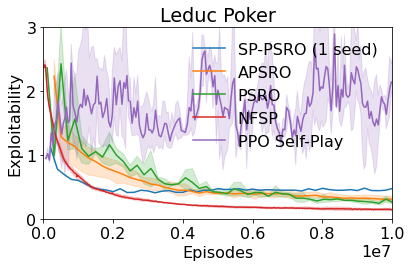

In [4]:
graph_df_and_save_figure(
    non_psro_run_dict=non_psro_runs,
    psro_run_dict=psro_runs,
    df=df,
    title=graph_title,
    xlim=xlim,
    ylim=ylim,
    use_approx_exploitability=use_approx_exploitability)
